In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True )

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [ ]:
training_set[1]

(array([[[[0.12972116, 0.20629615, 0.4129017 ],
          [0.13544852, 0.21387988, 0.42172304],
          [0.13967949, 0.21811086, 0.42595398],
          ...,
          [0.13107003, 0.17544426, 0.34820393],
          [0.1393457 , 0.19293694, 0.38195232],
          [0.14866146, 0.21739456, 0.42038855]],
 
         [[0.13293576, 0.20951074, 0.4161163 ],
          [0.13894463, 0.21737601, 0.42521915],
          [0.14101642, 0.2194478 , 0.42729095],
          ...,
          [0.12863089, 0.17300512, 0.34576482],
          [0.1393457 , 0.19293694, 0.38195232],
          [0.14273888, 0.21147196, 0.41446596]],
 
         [[0.15643464, 0.20401748, 0.3848522 ],
          [0.15310802, 0.21349111, 0.43105838],
          [0.14085595, 0.22477774, 0.44716898],
          ...,
          [0.13083178, 0.18581341, 0.35326937],
          [0.14167155, 0.20250808, 0.3879008 ],
          [0.15192908, 0.22066218, 0.42365617]],
 
         ...,
 
         [[0.85152334, 0.75348616, 0.6672123 ],
          [0.88503

In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D, Dense, Flatten, MaxPooling2D

In [ ]:
model = Model(input_shape=(64, 64, 3))
model.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
251/251 [==============================] - 40s 159ms/step - loss: 0.6849 - accuracy: 0.5468 - val_loss: 0.6554 - val_accuracy: 0.6035
Epoch 2/20
251/251 [==============================] - 39s 157ms/step - loss: 0.6112 - accuracy: 0.6600 - val_loss: 0.6064 - val_accuracy: 0.6670
Epoch 3/20
251/251 [==============================] - 39s 157ms/step - loss: 0.5883 - accuracy: 0.6865 - val_loss: 0.5786 - val_accuracy: 0.7045
Epoch 4/20
251/251 [==============================] - 39s 154ms/step - loss: 0.5801 - accuracy: 0.6937 - val_loss: 0.5509 - val_accuracy: 0.7235
Epoch 5/20
251/251 [==============================] - 39s 156ms/step - loss: 0.5420 - accuracy: 0.7254 - val_loss: 0.5470 - val_accuracy: 0.7310
Epoch 6/20
251/251 [==============================] - 39s 155ms/step - loss: 0.5415 - accuracy: 0.7212 - val_loss: 0.5697 - val_accuracy: 0.7120
Epoch 7/20
251/251 [==============================] - 40s 159ms/step - loss: 0.5254 - accuracy: 0.7332 - val_loss: 0.5436 - val_ac

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 20)


Epoch 1/20
251/251 [==============================] - 41s 164ms/step - loss: 0.4442 - accuracy: 0.7870 - val_loss: 0.5070 - val_accuracy: 0.7655
Epoch 2/20
251/251 [==============================] - 42s 168ms/step - loss: 0.4445 - accuracy: 0.7918 - val_loss: 0.5033 - val_accuracy: 0.7660
Epoch 3/20
251/251 [==============================] - 41s 164ms/step - loss: 0.4336 - accuracy: 0.7961 - val_loss: 0.5200 - val_accuracy: 0.7520
Epoch 4/20
251/251 [==============================] - 41s 164ms/step - loss: 0.4350 - accuracy: 0.7963 - val_loss: 0.5077 - val_accuracy: 0.7685
Epoch 5/20
251/251 [==============================] - 42s 168ms/step - loss: 0.4337 - accuracy: 0.7943 - val_loss: 0.5318 - val_accuracy: 0.7520
Epoch 6/20
251/251 [==============================] - 42s 166ms/step - loss: 0.4191 - accuracy: 0.8054 - val_loss: 0.5099 - val_accuracy: 0.7775
Epoch 7/20
251/251 [==============================] - 41s 164ms/step - loss: 0.4207 - accuracy: 0.8019 - val_loss: 0.5249 - val_ac

In [ ]:
model.Dropout(0.2)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

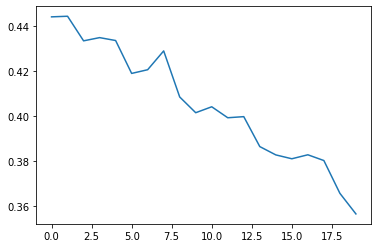

In [ ]:
plt.plot(history.history['loss'])

Modified model with a second Convolutional Layer


In [ ]:
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,3,3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
251/251 [==============================] - 42s 167ms/step - loss: 0.6937 - accuracy: 0.5045 - val_loss: 0.6905 - val_accuracy: 0.5360
Epoch 2/20
251/251 [==============================] - 41s 163ms/step - loss: 0.6910 - accuracy: 0.5259 - val_loss: 0.6869 - val_accuracy: 0.5795
Epoch 3/20
251/251 [==============================] - 41s 163ms/step - loss: 0.6855 - accuracy: 0.5502 - val_loss: 0.6639 - val_accuracy: 0.6010
Epoch 4/20
251/251 [==============================] - 40s 159ms/step - loss: 0.6671 - accuracy: 0.5875 - val_loss: 0.6844 - val_accuracy: 0.5785
Epoch 5/20
251/251 [==============================] - 39s 157ms/step - loss: 0.6570 - accuracy: 0.6056 - val_loss: 0.6731 - val_accuracy: 0.6085
Epoch 6/20
251/251 [==============================] - 38s 153ms/step - loss: 0.6410 - accuracy: 0.6252 - val_loss: 0.6455 - val_accuracy: 0.6280
Epoch 7/20
251/251 [==============================] - 39s 155ms/step - loss: 0.6300 - accuracy: 0.6526 - val_loss: 0.6313 - val_ac

In [ ]:
import numpy as np

In [ ]:
from keras.preprocessing import image

In [ ]:
test_image = image.load_img('/content/gdrive/My Drive/dataset/single_prediction/cat_or_dog_1.jpg',target_size = (64, 64))

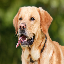

In [ ]:
test_image

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis =0)

In [ ]:
prediction = model.predict(test_image)

In [ ]:
prediction

array([[1.]], dtype=float32)

In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
if prediction[0][0] == 1:
  predictions = 'dog'
else:
  predictions = 'cat'

In [ ]:
prediction

array([[1.]], dtype=float32)

In [ ]:
predictions

'dog'